<ipython-input-1-ec9547a5023d>:82: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, _, _ = measure.marching_cubes_lewiner(Z, 0, spacing=(1, 1, 1), step_size=2)


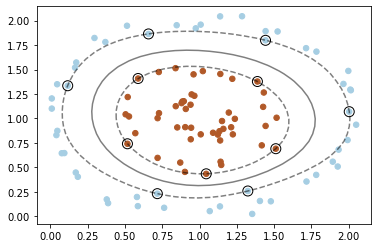

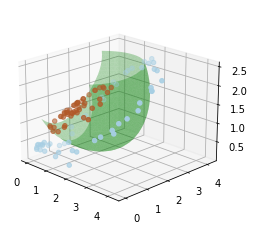

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from skimage import measure
from sklearn.datasets import make_blobs, make_circles

from tikzplotlib import save as tikz_save
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

plt.close('all')

# we create 50 separable points
#X, y = make_blobs(n_samples=40, centers=2, random_state=6)
X,  y  = make_circles(n_samples=50, factor=0.5, random_state=4, noise=.05)
X2, y2 = make_circles(n_samples=50, factor=0.2, random_state=5, noise=.08)

X = np.append(X,X2, axis=0)
y = np.append(y,y2, axis=0)

# shifte X to [0,2]x[0,2]
X = np.array([[item[0] + 1, item[1] + 1] for item in X])
X[X<0] = 0.01

clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--','-','--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


################## KERNEL TRICK - 3D ##################

trans_X = np.array([[item[0]**2, item[1]**2, np.sqrt(2*item[0]*item[1])] for item in X])

fig = plt.figure()
ax = plt.axes(projection ="3d")

# creating scatter plot
ax.scatter3D(trans_X[:,0],trans_X[:,1],trans_X[:,2], c = y, cmap=plt.cm.Paired)

clf2 = svm.SVC(kernel='rbf', C=1000)
clf2.fit(trans_X, y)


z = lambda x,y: (-clf2.intercept_[0]-clf2.coef_[0][0]*x-clf2.coef_[0][1]*y) / clf2.coef_[0][2]

ax = plt.gca(projection='3d')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()


xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
zz = np.linspace(zlim[0], zlim[1], 50)
XX ,YY, ZZ = np.meshgrid(xx, yy, zz)
xyz = np.vstack([XX.ravel(), YY.ravel(), ZZ.ravel()]).T
Z = clf2.decision_function(xyz).reshape(XX.shape)

# find isosurface with marching cubes
dx = xx[1] - xx[0]
dy = yy[1] - yy[0]
dz = zz[1] - zz[0]
verts, faces, _, _ = measure.marching_cubes_lewiner(Z, 0, spacing=(1, 1, 1), step_size=2)
verts *= np.array([dx, dy, dz])
verts -= np.array([xlim[0], ylim[0], zlim[0]])

# add as Poly3DCollection
mesh = Poly3DCollection(verts[faces])
mesh.set_facecolor('g')
mesh.set_edgecolor('none')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)
ax.view_init(20, -45)
plt.savefig('kerneltrick')